<a href="https://colab.research.google.com/github/csanadferencz/ADAS-/blob/main/EPLab2020_01e_PythonDataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EPLab 01e: Python Data Loading and Visualization**
v2020.01


---

Version history:  
v2020.01 - initial version

---

### Code initialization: load libraries and custom utilities

In [ ]:
# Let us first import the necessary libraries
import numpy as np                                  # for linear algebra
import matplotlib.pyplot as plt                     # for data visualization
from matplotlib.colors import ListedColormap        # for color palettes
import abc                                          # for abstract class definitions (generic Model type)
import math                                         # for trunc

### Some simple prerequisites

In [ ]:
# ROUND vs TRUNCATE
print(round(5.5, 0))
print(round(5.555, 2))
print(round(5.556, 2))

6.0
5.55
5.56


In [ ]:
def truncate(number, digits):
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

In [ ]:
print(truncate(5.5, 0))
print(truncate(5.555, 2))
print(truncate(5.556, 2))

5.0
5.55
5.55


In [ ]:
# numpy functions: RAVEL, RESHAPE
print(f"RAVEL")
dummy_ndarray = np.array([[10,20,30,40,50,60],
                          [70,80,90,100,110,120]])
print(dummy_ndarray)

raveled_dummy_ndarray = dummy_ndarray.ravel()
print(f"Type  before raveling: {type(dummy_ndarray)} | after: {type(raveled_dummy_ndarray)}")
print(f"Shape before raveling: {dummy_ndarray.shape} | after: {raveled_dummy_ndarray.shape}")

print(raveled_dummy_ndarray)

print(f"\nRESHAPE")
print(f"Also reshape works, though more generic:")
print(f"~~~~~~1D~~~~~~\n{dummy_ndarray.reshape(12,)}")
print(f"~~~~~~2D~~~~~~\n{dummy_ndarray.reshape(6,2)}")
print(f"~~~~~~3D~~~~~~\n{dummy_ndarray.reshape(2,3,2)}")

RAVEL
[[ 10  20  30  40  50  60]
 [ 70  80  90 100 110 120]]
Type  before raveling: <class 'numpy.ndarray'> | after: <class 'numpy.ndarray'>
Shape before raveling: (2, 6) | after: (12,)
[ 10  20  30  40  50  60  70  80  90 100 110 120]

RESHAPE
Also reshape works, though more generic:
~~~~~~1D~~~~~~
[ 10  20  30  40  50  60  70  80  90 100 110 120]
~~~~~~2D~~~~~~
[[ 10  20]
 [ 30  40]
 [ 50  60]
 [ 70  80]
 [ 90 100]
 [110 120]]
~~~~~~3D~~~~~~
[[[ 10  20]
  [ 30  40]
  [ 50  60]]

 [[ 70  80]
  [ 90 100]
  [110 120]]]


In [ ]:
# python list comprehension technique
some_nums = list(range(15, 30, 3))
print(f"{type(some_nums)}: {some_nums}")

other_nums = [i/3 for i in some_nums]
print(f"{type(other_nums)}: {other_nums}")

<class 'list'>: [15, 18, 21, 24, 27]
<class 'list'>: [5.0, 6.0, 7.0, 8.0, 9.0]


In [ ]:
# numpy logical selection
some_weekdays = np.array([3,2,5,2,1,4,7,6,7,2]).astype(np.int8)
chosen_tuesdays_boolean = (some_weekdays==2)
idx_chosen_tuesdays = np.where(chosen_tuesdays_boolean)[0]
nof_chosen_tuesdays = np.sum(chosen_tuesdays_boolean)

def pretty_string(numpy_data):
    return f"{str(type(numpy_data)):<30}{str(numpy_data.dtype):<10}{numpy_data}"
    
print(pretty_string(some_weekdays))
print(pretty_string(chosen_tuesdays_boolean))
print(pretty_string(idx_chosen_tuesdays))
print(pretty_string(nof_chosen_tuesdays))

<class 'numpy.ndarray'>       int8      [3 2 5 2 1 4 7 6 7 2]
<class 'numpy.ndarray'>       bool      [False  True False  True False False False False False  True]
<class 'numpy.ndarray'>       int64     [1 3 9]
<class 'numpy.int64'>         int64     3


In [ ]:
chosen_tuesdays_int = chosen_tuesdays_boolean.astype(np.int8)
nof_chosen_tuesdays = np.sum(chosen_tuesdays_int)

print(pretty_string(chosen_tuesdays_int))
print(pretty_string(nof_chosen_tuesdays))

<class 'numpy.ndarray'>       int8      [0 1 0 1 0 0 0 0 0 1]
<class 'numpy.int64'>         int64     3


In [ ]:
ys =    np.array([[1.0, 2.0],
                  [3.0, 4.0],
                  [5.0, 6.0]])
yhats = np.array([[1.0, 2.1],
                  [3.0, 4.0],
                  [4.9, 6.0]])

print(ys==yhats)
print(np.sum(ys==yhats))
print(np.sum(ys==yhats, axis=0))
print(np.sum(ys==yhats, axis=1))

# This is an overload of the vanilla python sum operation (NOT numpy): don't use to avoid confusion
print(sum(ys==yhats))  

[[ True False]
 [ True  True]
 [False  True]]
4
[2 2]
[1 2 1]
[2 2]


### Download some data

You can download data from anywhere on the public internet.  
If you want to download data from your own Google Drive account:  

(1) Share data item via read-only link (accessible by anyone).  

(2) Copy middle part of link, e.g.:   
- from https://drive.google.com/file/d/1KZDp_RNJQHPgYIyW23PTnkx-PKh7RTZm/view?usp=sharing  
- copy `1KZDp_RNJQHPgYIyW23PTnkx-PKh7RTZm`  

(3) paste (append) from the clipboard to form a direct download link as such:  
https://drive.google.com/uc?id=1KZDp_RNJQHPgYIyW23PTnkx-PKh7RTZm

In [ ]:
# Next we will download the "Driving mode" datasets to our virtual machine (run this only once)
!gdown https://drive.google.com/uc?id=1GIn8RpPUJKxJKHE15Sdsm62zdV15m8UL
!gdown https://drive.google.com/uc?id=1KZDp_RNJQHPgYIyW23PTnkx-PKh7RTZm
!gdown https://drive.google.com/uc?id=1NOY3hJISmi8y5ZKZi1TU7zOxnzPkXpfG

Downloading...
From: https://drive.google.com/uc?id=1GIn8RpPUJKxJKHE15Sdsm62zdV15m8UL
To: /content/drivingmode_devval_data.csv
100% 754k/754k [00:00<00:00, 97.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KZDp_RNJQHPgYIyW23PTnkx-PKh7RTZm
To: /content/drivingmode_finaltest_data.csv
100% 1.51M/1.51M [00:00<00:00, 100MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NOY3hJISmi8y5ZKZi1TU7zOxnzPkXpfG
To: /content/drivingmode_train_data.csv
100% 77.2k/77.2k [00:00<00:00, 29.3MB/s]


Now you should be able to see the three downloaded csv files in the "Files" tab in the left pane (if the left pane is hidden or shows something else, click the "Files" icon to the left). Maybe you have to click "`Refresh`" icon to see your files in the default folder (`/content`). Note this is not a persistent storage, so anything you store here might be gone if you close the runtime (e.g. by closing the browser or being inactive).

### Take a look at the data

In [ ]:
# Let's look into one of the files
!head -10 drivingmode_train_data.csv

1.092300033569335938e+02,3.539999961853027344e+00,-1.000000000000000000e+00
1.010999984741210938e+02,-4.099999964237213135e-01,-1.000000000000000000e+00
2.245000076293945312e+01,1.326000022888183594e+01,1.000000000000000000e+00
4.056999969482421875e+01,3.159000015258789062e+01,1.000000000000000000e+00
3.661999893188476562e+01,-8.109999656677246094e+00,-1.000000000000000000e+00
8.393000030517578125e+01,1.128999996185302734e+01,-1.000000000000000000e+00
5.236000061035156250e+01,-9.060000419616699219e+00,-1.000000000000000000e+00
4.036000061035156250e+01,-1.795000076293945312e+01,-1.000000000000000000e+00
3.169000053405761719e+01,3.030999946594238281e+01,1.000000000000000000e+00
2.570999908447265625e+01,1.527000045776367188e+01,1.000000000000000000e+00


In [ ]:
# Now we will load the data from files into memory, specifically into Numpy matrices
train_xys_all = np.loadtxt("drivingmode_train_data.csv", delimiter=',')
devval_xys = np.loadtxt("drivingmode_devval_data.csv", delimiter=',')
fintest_xys = np.loadtxt("drivingmode_finaltest_data.csv", delimiter=',')

# split the data into a feature-matrix and a label-matrix
train_xys_all = train_xys_all[:,:-1], train_xys_all[:,-1:]       # convert to tuple
train_xs_all, train_ys_all = train_xys_all[0], train_xys_all[1]  # extract matrices
devval_xys = devval_xys[:,:-1], devval_xys[:,-1:]                # convert to tuple
devval_xs, devval_ys = devval_xys[0], devval_xys[1]              # extract matrices
fintest_xys = fintest_xys[:,:-1], fintest_xys[:,-1:]             # convert to tuple
fintest_xs, fintest_ys = fintest_xys[0], fintest_xys[1]          # extract matrices

print('Training (full)        dataset shape:', train_xs_all.shape, train_ys_all.shape,
      '  example:', train_xs_all[0], train_ys_all[0])
print('Development-validation dataset shape:', devval_xs.shape, devval_ys.shape,
      'example:', devval_xs[0], devval_ys[0])
print('Final test             dataset shape:', fintest_xs.shape, fintest_ys.shape,
      'example:', fintest_xs[0], fintest_ys[0])

Training (full)        dataset shape: (1024, 2) (1024, 1)   example: [109.23000336   3.53999996] [-1.]
Development-validation dataset shape: (10000, 2) (10000, 1) example: [ 80.05999756 -11.13000011] [-1.]
Final test             dataset shape: (20000, 2) (20000, 1) example: [32.52999878 38.5       ] [1.]


In [ ]:
# We will restrict our training data to five subsets of varying sizes
train_sets = [(train_xs_all[:2**i], train_ys_all[:2**i]) for i in range(2, 11, 2)]  # i = [2, 4, 6, 8, 10]
train_4_xys    = train_sets[0]
train_16_xys   = train_sets[1]
train_64_xys   = train_sets[2]
train_256_xys  = train_sets[3]
train_1024_xys = train_sets[4]
for i in range(5):
    print(f'Training ({train_sets[i][0].shape[0]:4d}) dataset shape:', train_sets[i][0].shape, train_sets[i][1].shape,
          '  example:', train_sets[i][0][-1], train_sets[i][1][-1])

Training (   4) dataset shape: (4, 2) (4, 1)   example: [40.56999969 31.59000015] [1.]
Training (  16) dataset shape: (16, 2) (16, 1)   example: [66.5         4.32000017] [1.]
Training (  64) dataset shape: (64, 2) (64, 1)   example: [ 1.05999994 16.98999977] [-1.]
Training ( 256) dataset shape: (256, 2) (256, 1)   example: [27.63999939 26.25      ] [1.]
Training (1024) dataset shape: (1024, 2) (1024, 1)   example: [39.25        4.15999985] [1.]


### Visualize data with `matplotlib`

In [ ]:
# some visual style definitions
colors_trainset =  ['#0000AA', '#AA0000']
colors_devvalset = ['#AAAAFF', '#FFAAAA']

In [ ]:
# python list comprehension technique
devvaly_styleidxs = ((devval_ys.ravel()+1)/2).astype(np.int8)  # convert response variable from {-1|+1} to {0|1}
facecolor=[colors_devvalset[i] for i in devvaly_styleidxs]
print(f"Style indices: {devvaly_styleidxs[:10]}...")
print(f"Face colors  : {facecolor[:10]}...")

Style indices: [0 1 1 0 0 1 1 1 1 1]...
Face colors  : ['#AAAAFF', '#FFAAAA', '#FFAAAA', '#AAAAFF', '#AAAAFF', '#FFAAAA', '#FFAAAA', '#FFAAAA', '#FFAAAA', '#FFAAAA']...


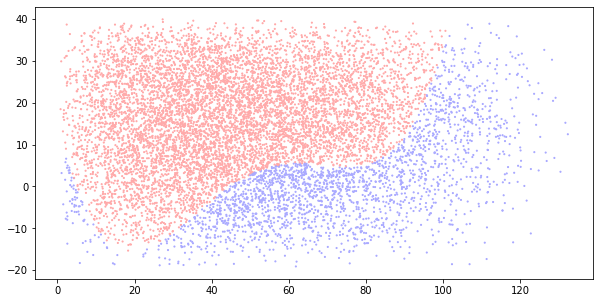

In [ ]:
# plot devval set
plt.figure(figsize=(10,5))
plt.scatter(devval_xs[:, 0], devval_xs[:, 1],
					marker = '.', facecolor=[colors_devvalset[i] for i in devvaly_styleidxs], s=5)

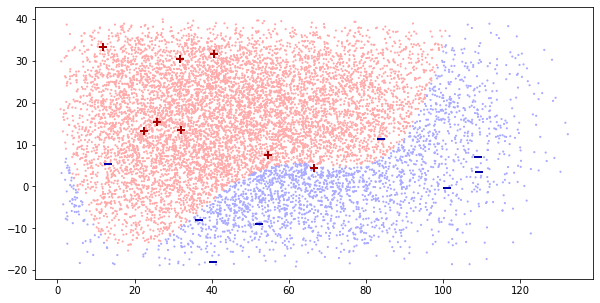

In [ ]:
train_xys = train_16_xys
train_xs, train_ys = train_xys

plt.figure(figsize=(10,5))

if devval_xys is not None:
    # add devval points
    devvaly_styleidxs = ((devval_ys.ravel()+1)/2).astype(np.int8)
    plt.scatter(devval_xs[:, 0], devval_xs[:, 1],
                marker = '.', facecolor=[colors_devvalset[i] for i in devvaly_styleidxs], s=5)

if train_xys is not None:
    # add positive training points
    are_positive = (train_ys==1).ravel()
    plt.scatter(train_xs[are_positive, 0], train_xs[are_positive, 1],
                marker = '+', facecolor=colors_trainset[1], linewidth=8, s=5)
    # add negative training points
    are_negative = (train_ys==-1).ravel()
    plt.scatter(train_xs[are_negative, 0], train_xs[are_negative, 1],
                marker = '|', facecolor=colors_trainset[0], linewidth=8, s=5)

### Binary classification model class template

In [ ]:
# 2D binary classification model class template
class Model(abc.ABC):
	"""Abstract (non-instantiable) Model class."""

	def __init__(self):
		"""Empty constructor by default."""
		pass

	def __str__(self):
		"""Allows easier printing."""
		return self.get_model_name()

	@abc.abstractmethod
	def get_model_name(self):
		"""Every model has to implement this interface.
		Input:
			-   None.
		Output:
			-   Arbitrary name string (for printing purposes).
		"""
		pass

	@abc.abstractmethod
	def train(self, train_set):
		"""Every model has to implement this interface.
		Input:
			-   Data and labels in a single tuple of two separate (m,d) and (m,1) 2D numpy matrices.
		Output:
			-   None.
		"""
		pass

	@abc.abstractmethod
	def predict(self, input_xs):
		"""Every model has to implement this interface.
		Input:
			-   Input data as a (m,d) 2D numpy matrix.
		Output:
			-   Predicted labels as a (m,1) 2D numpy matrix.
		"""
		pass

	def evaluate(self, input_xs, input_ys):
		if input_ys.ndim == 1:
			input_ys = input_ys[:, np.newaxis]
		assert input_xs.shape[0] == input_ys.shape[0]

		# run the model
		yhats = self.predict(input_xs)
		result = self.compare_predictions(yhats, input_ys)

		return result

	@staticmethod
	def compare_predictions(yhats, ys):
		if yhats.ndim == 1:
			yhats = yhats[:, np.newaxis]
		if ys.ndim == 1:
			ys = ys[:, np.newaxis]
		assert yhats.shape[0] == ys.shape[0]

		ACC, PRC, REC = None, None, None
		if ys.shape[0] > 0:
			ACC = truncate(100 * np.sum(yhats == ys, axis=0)[0] / ys.shape[0], 2)
		idx_pred_pos = np.where((yhats == 1))[0]
		idx_actu_pos = np.where((ys == 1))[0]
		if idx_pred_pos.size > 0:
			PRC = truncate(100 * np.sum(yhats[idx_pred_pos] == ys[idx_pred_pos], axis=0)[0] / idx_pred_pos.shape[0], 2)
		if idx_actu_pos.size > 0:
			REC = truncate(100 * np.sum(yhats[idx_actu_pos] == ys[idx_actu_pos], axis=0)[0] / idx_actu_pos.shape[0], 2)
		return ACC, PRC, REC

In [ ]:
# Define dummy model class
class DummyModel(Model):
	"""Instantiable dummy Model class."""
    
	def get_model_name(self):
		return "Dummy Model"

	def train(self, train_set):
		print("Training is not supported by this model, it is fixed.")

	def predict(self, input_xs):
		return np.sign(-1*input_xs[:,0] + 2*input_xs[:,1])

In [ ]:
# instantiate dummy model
model = DummyModel()
model.train(train_xys)
print(train_xs)
print(train_ys.ravel())
print(model.predict(train_xs))

Training is not supported by this model, it is fixed.
[[109.23000336   3.53999996]
 [101.09999847  -0.41      ]
 [ 22.45000076  13.26000023]
 [ 40.56999969  31.59000015]
 [ 36.61999893  -8.10999966]
 [ 83.93000031  11.28999996]
 [ 52.36000061  -9.06000042]
 [ 40.36000061 -17.95000076]
 [ 31.69000053  30.30999947]
 [ 25.70999908  15.27000046]
 [ 32.02999878  13.38000011]
 [109.19999695   7.11999989]
 [ 13.17000008   5.46000004]
 [ 11.68999958  33.38000107]
 [ 54.63000107   7.38000011]
 [ 66.5          4.32000017]]
[-1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.]
[-1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1.]


In [ ]:
print(f"Train   ACC%, PRC%, RCL%: {model.evaluate(train_xs, train_ys)}")
print(f"Devval  ACC%, PRC%, RCL%: {model.evaluate(devval_xs, devval_ys)}")

Train   ACC%, PRC%, RCL%: (81.25, 100.0, 62.5)
Devval  ACC%, PRC%, RCL%: (49.51, 99.55, 34.6)


### Visualize evaluation of models

In [ ]:
# Visualizing with matplotlib
def visual_evaluate(trained_model: Model, train_xys, devval_xys, prepend_ones=False):
	train_xs, train_ys = train_xys if train_xys is not None else (None, None)
	devval_xs, devval_ys = devval_xys if devval_xys is not None else (None, None)

	# visual style definitions
	h = 0.5                   # step size in the mesh
	colors_trainset =  ['#0000AA', '#AA0000']
	colors_devvalset = ['#AAAAFF', '#FFAAAA']
	colors_bg =        ['#DDDDFF', '#FFEEEE']
	x1_min, x1_max = -5, 145  # km/h
	x2_min, x2_max = -25, 45  # °C
	
	# start new plot figure
	plt.figure(figsize=(10,5))
	
	if trained_model is not None:
		# evaluate on training / devval set
		train_performance = trained_model.evaluate(train_xs, train_ys) if train_xys is not None else None
		devval_performance = trained_model.evaluate(devval_xs, devval_ys) if devval_xys is not None else None

		# predict background to visualize decision boundary
		xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))  # overlapping grids: both coos.
		gridcoos_raveled = np.concatenate((xx1.ravel()[:, np.newaxis], xx2.ravel()[:, np.newaxis]), axis=1)
		yhat_bg = trained_model.predict(gridcoos_raveled)
		yhat_bg = yhat_bg.reshape(xx1.shape)

		# add background
		if (yhat_bg==1).all():
			colors_bg = colors_bg[1:]
		if (yhat_bg==-1).all():
			colors_bg = colors_bg[:1]
		plt.pcolormesh(xx1, xx2, yhat_bg, cmap=ListedColormap(colors_bg))

	if devval_xys is not None:
		# add devval points
		devvaly_styleidxs = ((devval_ys.ravel()+1)/2).astype(np.int8)
		plt.scatter(devval_xs[:, 0], devval_xs[:, 1],
					marker = '.', facecolor=[colors_devvalset[i] for i in devvaly_styleidxs], s=5)

	if train_xys is not None:
		# add positive training points
		are_positive = (train_ys==1).ravel()
		plt.scatter(train_xs[are_positive, 0], train_xs[are_positive, 1],
					marker = '+', facecolor=colors_trainset[1], linewidth=8, s=5)
		# add negative training points
		are_negative = (train_ys==-1).ravel()
		plt.scatter(train_xs[are_negative, 0], train_xs[are_negative, 1],
					marker = '|', facecolor=colors_trainset[0], linewidth=8, s=5)

	# plot formatting
	plt.xlim(x1_min, x1_max)
	plt.ylim(x2_min, x2_max)
	if trained_model is not None:
		plt.title(f'{trained_model.get_model_name()} trained on {train_xs.shape[0] if train_xs is not None else None} examples.' \
				  f'\n train  ACC%, PRC%, RCL%: {train_performance}' \
				  f'\n devval ACC%, PRC%, RCL%: {devval_performance}')

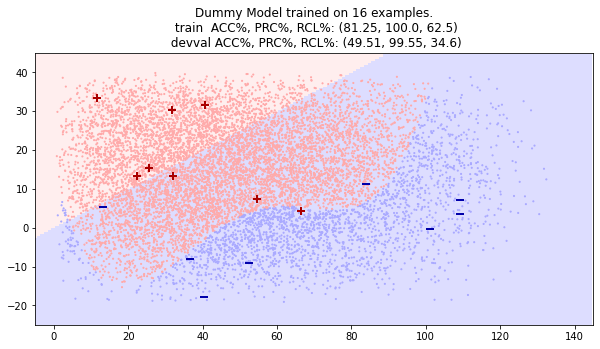

In [ ]:
visual_evaluate(model, train_xys, devval_xys)